## the idea
V1

the idea here is to remove samples with <5 detected cell patches.

then we only consider samples with detection from 5 to 12

next from the rest for the dataframe (13 to inf) we only select samples with one class 


the idea here is to go easy on the model by not confusing it a lot . here if we have 80+ detection aieth three class 1,2,3 how can the model, dataloader be aware of what to put in the random cell with all three class. this is not easy so its better to downsample in the following 

In [1]:
# starting with minimum area of 30000. lets see how it goes

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
train_df = pd.read_csv('../data/cell_mask_study_30000.csv')

In [6]:
print(train_df.shape)
train_df.head()

(21806, 25)


,Unnamed: 0,ID,Label,0,1,2,3,4,5,6,...,12,13,14,15,16,17,18,fold,total_cell_mask,selected_cells
0,0,5c27f04c-bb99-11e8-b2b9-ac1f6b6435d0,8|5|0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,8,7
1,1,5fb643ee-bb99-11e8-b2b9-ac1f6b6435d0,14|0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,15,15
2,2,60b57878-bb99-11e8-b2b9-ac1f6b6435d0,6|1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,2,17,16
3,3,5c1a898e-bb99-11e8-b2b9-ac1f6b6435d0,16|10,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,2,17,17
4,4,5b931256-bb99-11e8-b2b9-ac1f6b6435d0,14|0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,45,43


In [22]:
filtered_df_13_less = train_df[(train_df['selected_cells'] >4) & (train_df['selected_cells'] < 13)] 
print(filtered_df_13_less.shape)
filtered_df_13_less.head()

(4627, 25)


,Unnamed: 0,ID,Label,0,1,2,3,4,5,6,...,12,13,14,15,16,17,18,fold,total_cell_mask,selected_cells
0,0,5c27f04c-bb99-11e8-b2b9-ac1f6b6435d0,8|5|0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,8,7
5,5,5e22a522-bb99-11e8-b2b9-ac1f6b6435d0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,10,9
7,7,5c68183e-bb99-11e8-b2b9-ac1f6b6435d0,13|0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,4,10,10
21,21,6074a6a4-bb99-11e8-b2b9-ac1f6b6435d0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,5,5
24,24,643f73a4-bb99-11e8-b2b9-ac1f6b6435d0,14,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,2,12,12


In [23]:
filtered_13_high = train_df[train_df['selected_cells'] >=13]
print(filtered_13_high.shape)
filtered_13_high.head()

(17127, 25)


,Unnamed: 0,ID,Label,0,1,2,3,4,5,6,...,12,13,14,15,16,17,18,fold,total_cell_mask,selected_cells
1,1,5fb643ee-bb99-11e8-b2b9-ac1f6b6435d0,14|0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,15,15
2,2,60b57878-bb99-11e8-b2b9-ac1f6b6435d0,6|1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,2,17,16
3,3,5c1a898e-bb99-11e8-b2b9-ac1f6b6435d0,16|10,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,2,17,17
4,4,5b931256-bb99-11e8-b2b9-ac1f6b6435d0,14|0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,45,43
6,6,5f79a114-bb99-11e8-b2b9-ac1f6b6435d0,14,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,4,15,15


In [35]:

filtered_13_high['is_single'] = filtered_13_high[[str(i) for i in range(0,18)]].apply(np.sum, axis=1)
filtered_13_high.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Unnamed: 0,ID,Label,0,1,2,3,4,5,6,...,13,14,15,16,17,18,fold,total_cell_mask,selected_cells,is_single
1,1,5fb643ee-bb99-11e8-b2b9-ac1f6b6435d0,14|0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,15,15,2
2,2,60b57878-bb99-11e8-b2b9-ac1f6b6435d0,6|1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,2,17,16,2
3,3,5c1a898e-bb99-11e8-b2b9-ac1f6b6435d0,16|10,0,0,0,0,0,0,0,...,0,0,0,1,0,0,2,17,17,2
4,4,5b931256-bb99-11e8-b2b9-ac1f6b6435d0,14|0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,45,43,2
6,6,5f79a114-bb99-11e8-b2b9-ac1f6b6435d0,14,0,0,0,0,0,0,0,...,0,1,0,0,0,0,4,15,15,1


In [37]:
filtered_13_high_single_class = filtered_13_high[filtered_13_high['is_single'] ==1]
print(filtered_13_high_single_class.shape)
filtered_13_high_single_class.head()

(8385, 26)


,Unnamed: 0,ID,Label,0,1,2,3,4,5,6,...,13,14,15,16,17,18,fold,total_cell_mask,selected_cells,is_single
6,6,5f79a114-bb99-11e8-b2b9-ac1f6b6435d0,14,0,0,0,0,0,0,0,...,0,1,0,0,0,0,4,15,15,1
9,9,5c801c04-bb99-11e8-b2b9-ac1f6b6435d0,14,0,0,0,0,0,0,0,...,0,1,0,0,0,0,3,17,16,1
10,10,5e9afd56-bb99-11e8-b2b9-ac1f6b6435d0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,4,89,66,1
11,11,5f1af6b4-bb99-11e8-b2b9-ac1f6b6435d0,3,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,23,22,1
13,13,5fb9edb4-bb99-11e8-b2b9-ac1f6b6435d0,9,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,25,25,1


In [39]:
filtered_full = pd.concat([filtered_df_13_less, filtered_13_high_single_class])
print(filtered_full.shape)
filtered_full.head()

(13012, 26)


,Unnamed: 0,ID,Label,0,1,2,3,4,5,6,...,13,14,15,16,17,18,fold,total_cell_mask,selected_cells,is_single
0,0,5c27f04c-bb99-11e8-b2b9-ac1f6b6435d0,8|5|0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,8,7,NaN
5,5,5e22a522-bb99-11e8-b2b9-ac1f6b6435d0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,4,10,9,NaN
7,7,5c68183e-bb99-11e8-b2b9-ac1f6b6435d0,13|0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,4,10,10,NaN
21,21,6074a6a4-bb99-11e8-b2b9-ac1f6b6435d0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,5,5,NaN
24,24,643f73a4-bb99-11e8-b2b9-ac1f6b6435d0,14,0,0,0,0,0,0,0,...,0,1,0,0,0,0,2,12,12,NaN


In [40]:
filtered_full.columns

Index(['Unnamed: 0', 'ID', 'Label', '0', '1', '2', '3', '4', '5', '6', '7',
       '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', 'fold',
       'total_cell_mask', 'selected_cells', 'is_single'],
      dtype='object')

In [42]:
filtered_full = filtered_full.drop(['Unnamed: 0'], axis = 1)

In [43]:
filtered_full.to_csv('../data/train_fold_v1.csv')

## we add teh fold split using data_splitter.py 

## after fold split analysis


In [44]:
train_df = pd.read_csv('../data/train_fold_v1.csv')


In [46]:
train_df.groupby('fold').count()

,Unnamed: 0,Unnamed: 0.1.1,ID,Label,0,1,2,3,4,5,...,12,13,14,15,16,17,18,total_cell_mask,selected_cells,is_single
fold,,,,,,,,,,,,,,,,,,,,,
0,2561,2561,2561,2561,2561,2561,2561,2561,2561,2561,...,2561,2561,2561,2561,2561,2561,2561,2561,2561,1615
1,2620,2620,2620,2620,2620,2620,2620,2620,2620,2620,...,2620,2620,2620,2620,2620,2620,2620,2620,2620,1699
2,2607,2607,2607,2607,2607,2607,2607,2607,2607,2607,...,2607,2607,2607,2607,2607,2607,2607,2607,2607,1650
3,2606,2606,2606,2606,2606,2606,2606,2606,2606,2606,...,2606,2606,2606,2606,2606,2606,2606,2606,2606,1698
4,2618,2618,2618,2618,2618,2618,2618,2618,2618,2618,...,2618,2618,2618,2618,2618,2618,2618,2618,2618,1723


## idea
lets find samples which have only single class and use it for visualizing the image . this will help us to see what the image consist of 

In [2]:
train_df = pd.read_csv('../data/cell_mask_study_30000.csv')

In [3]:
# will start with removing anything lesser than 5 cells
filtered_4_abv_df = train_df[(train_df['selected_cells'] >4) ]

In [4]:
filtered_4_abv_df['is_single'] = filtered_4_abv_df[[str(i) for i in range(0,18)]].apply(np.sum, axis=1)
filtered_4_abv_df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Unnamed: 0,ID,Label,0,1,2,3,4,5,6,...,13,14,15,16,17,18,fold,total_cell_mask,selected_cells,is_single
0,0,5c27f04c-bb99-11e8-b2b9-ac1f6b6435d0,8|5|0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,8,7,3
1,1,5fb643ee-bb99-11e8-b2b9-ac1f6b6435d0,14|0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,15,15,2
2,2,60b57878-bb99-11e8-b2b9-ac1f6b6435d0,6|1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,2,17,16,2
3,3,5c1a898e-bb99-11e8-b2b9-ac1f6b6435d0,16|10,0,0,0,0,0,0,0,...,0,0,0,1,0,0,2,17,17,2
4,4,5b931256-bb99-11e8-b2b9-ac1f6b6435d0,14|0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,45,43,2


In [6]:
filtered_single = filtered_4_abv_df[filtered_4_abv_df['is_single'] == 1]
filtered_single.head()

,Unnamed: 0,ID,Label,0,1,2,3,4,5,6,...,13,14,15,16,17,18,fold,total_cell_mask,selected_cells,is_single
5,5,5e22a522-bb99-11e8-b2b9-ac1f6b6435d0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,4,10,9,1
6,6,5f79a114-bb99-11e8-b2b9-ac1f6b6435d0,14,0,0,0,0,0,0,0,...,0,1,0,0,0,0,4,15,15,1
9,9,5c801c04-bb99-11e8-b2b9-ac1f6b6435d0,14,0,0,0,0,0,0,0,...,0,1,0,0,0,0,3,17,16,1
10,10,5e9afd56-bb99-11e8-b2b9-ac1f6b6435d0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,4,89,66,1
11,11,5f1af6b4-bb99-11e8-b2b9-ac1f6b6435d0,3,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,23,22,1


In [7]:
filtered_single.to_csv('../data/filtered_single.csv', index = False)

## lets viz it 

In [53]:
import imageio
import os
import matplotlib.pyplot as plt
import cv2

In [15]:
filtered_single['ID'].values[0]

'5e22a522-bb99-11e8-b2b9-ac1f6b6435d0'

In [27]:
img_red    = np.expand_dims(imageio.imread(os.path.join('../data/train',f"{filtered_single['ID'].values[10]}_red.png")), axis = -1)
img_yellow = np.expand_dims(imageio.imread(os.path.join('../data/train',f"{filtered_single['ID'].values[10]}_yellow.png")), axis = -1)
img_green  = np.expand_dims(imageio.imread(os.path.join('../data/train',f"{filtered_single['ID'].values[10]}_green.png")), axis = -1)
img_blue   = np.expand_dims(imageio.imread(os.path.join('../data/train',f"{filtered_single['ID'].values[10]}_blue.png")), axis = -1)

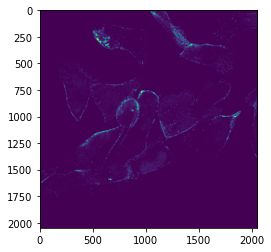

In [28]:
plt.imshow(img_green)

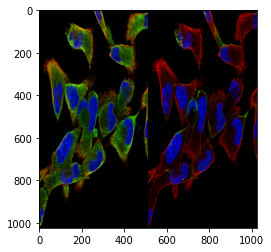

In [55]:
plt.imshow(cv2.resize(np.hstack([np.dstack([img_red, img_yellow, img_blue]), np.dstack([img_red, img_green, img_blue])]),(1024,1024)))

In [56]:
imageio.imwrite('../data/visualization/1.jpg',cv2.resize(np.hstack([np.dstack([img_red, img_yellow, img_blue]), np.dstack([img_red, img_green, img_blue])]),(1024,1024)))

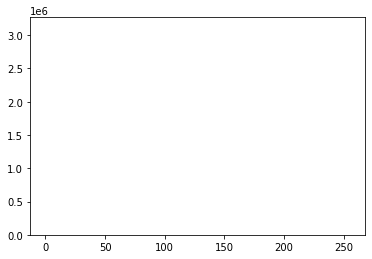

In [51]:
v = img_green.reshape(-1)
_ = plt.hist(v, bins='auto')
plt.show()

In [43]:
#red = red + yellow, green = green + yellow/2, blue=blue.
#but blending is not looking good
viz_red = img_red + img_yellow
viz_green = img_green + img_yellow/2.
viz_blue = img_blue

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


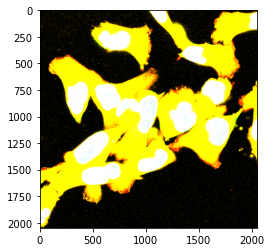

In [44]:
plt.imshow(np.dstack([viz_red, viz_green, viz_blue]))

In [ ]:
# try other

In [37]:
viz_red = img_red/2. + viz_green/2.
viz_green = img_yellow/2. + viz_green/2.
viz_blue = img_blue + viz_green/2.

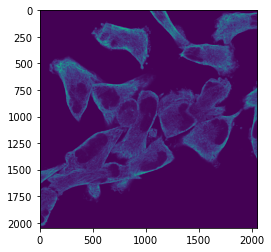

In [38]:
plt.imshow(viz_red)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


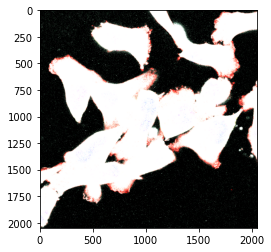

In [39]:
plt.imshow(np.dstack([viz_red, viz_green, viz_blue]))

In [ ]:
np.array([1,0,3,4,5,0])

In [58]:
np.count_nonzero(np.array([1,0,3,4,5,0]))

4

## resampling of dataset

In [ ]:
#lets get teh corelation matrix viz get going

In [2]:
train_fold_v2 = pd.read_csv('../data/train_fold_v2.csv')

In [3]:
labels = [str(i) for i in range(19)]
train_fold_v2['is_single'] = train_fold_v2[[str(i) for i in range(0,19)]].apply(np.sum, axis=1)

In [4]:
train_fold_v2.head()

,Unnamed: 0,ID,Label,0,1,2,3,4,5,6,...,13,14,15,16,17,18,fold,total_cell_mask,selected_cells,is_single
0,0,5c27f04c-bb99-11e8-b2b9-ac1f6b6435d0,8|5|0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,8,7,3
1,1,5e22a522-bb99-11e8-b2b9-ac1f6b6435d0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,2,10,9,1
2,2,5c68183e-bb99-11e8-b2b9-ac1f6b6435d0,13|0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,1,10,10,2
3,3,6074a6a4-bb99-11e8-b2b9-ac1f6b6435d0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,5,5,1
4,4,643f73a4-bb99-11e8-b2b9-ac1f6b6435d0,14,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,12,12,1


In [5]:
#for x in labels: train_fold_v2[x] = train_fold_v2['Label'].apply(lambda r: int(x in r.split('|')))

df_labels = train_fold_v2[labels]
coocc = df_labels.T.dot(df_labels)


In [6]:
coocc

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,3185,145,253,106,18,124,27,148,46,115,41,1,122,295,129,4,543,41,0
1,145,449,35,1,5,9,6,8,3,8,0,0,7,27,11,0,61,0,0
2,253,35,918,0,6,10,17,28,9,14,17,0,13,45,26,0,116,3,0
3,106,1,0,702,6,3,3,6,3,3,4,0,8,6,11,1,49,4,0
4,18,5,6,6,944,0,1,13,5,6,3,0,11,31,5,1,72,6,0
5,124,9,10,3,0,864,4,9,7,4,3,2,10,19,5,3,86,5,0
6,27,6,17,3,1,4,557,2,0,0,0,0,3,4,0,0,42,1,0
7,148,8,28,6,13,9,2,940,0,10,1,0,9,16,0,0,50,0,0
8,46,3,9,3,5,7,0,0,624,0,1,0,2,7,1,6,31,0,0
9,115,8,14,3,6,4,0,10,0,500,1,0,12,66,10,0,59,3,0


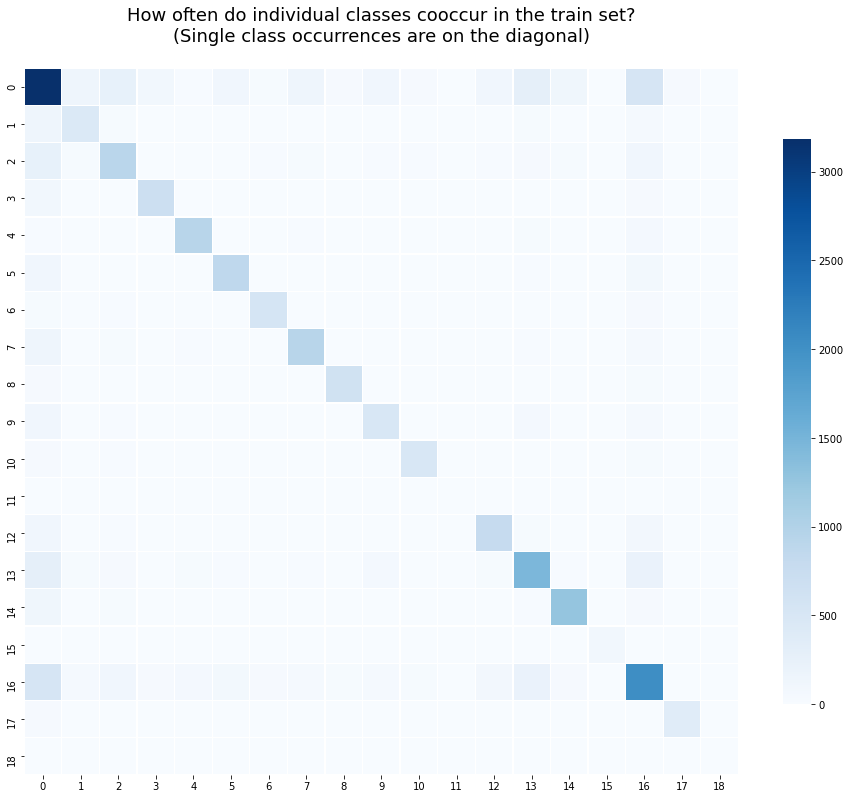

In [10]:
fig, ax = plt.subplots(figsize=(16, 13))
sns.heatmap(coocc, cmap="Blues", linewidth=0.3, cbar_kws={"shrink": .8})
title = 'How often do individual classes cooccur in the train set?\n(Single class occurrences are on the diagonal)\n'
plt.title(title, loc='center', fontsize=18)
plt.show()

## Removing 0 , 16 class

Now we will start with removing the 0 and 16 class .

step1: remove the 0,16 samples that are most corilated and only 2 of those class occer

step2: remove 0 , 1000 sample where only 0 class occers

step2: remove 16 , 500 sample where only 160 class occers


In [11]:
v = (train_fold_v2['0'] ==1) & (train_fold_v2['16'] ==1) & (train_fold_v2['is_single'] ==2)
~v

0        True
1        True
2        True
3        True
4        True
         ... 
13007    True
13008    True
13009    True
13010    True
13011    True
Length: 13012, dtype: bool

In [12]:
print(train_fold_v2.shape)
train_1_16_class = train_fold_v2[~v]
print(train_1_16_class.shape)

(13012, 26)
(12726, 26)


In [13]:
print(train_fold_v2[(train_fold_v2['0'] ==1) & (train_fold_v2['is_single'] ==1)].shape)
print(train_fold_v2[(train_fold_v2['16'] ==1) & (train_fold_v2['is_single'] ==1)].shape)

(1545, 26)
(897, 26)


In [14]:
v_0 = train_fold_v2[(train_fold_v2['0'] ==1) & (train_fold_v2['is_single'] ==1)].sample(n=1000, random_state=1)
v_16 = train_fold_v2[(train_fold_v2['16'] ==1) & (train_fold_v2['is_single'] ==1)].sample(n=500, random_state=1)
print(v_0.shape)
print(v_16.shape)

(1000, 26)
(500, 26)


In [15]:
train_1_16_class = train_1_16_class[~train_1_16_class['ID'].isin(v_0["ID"].unique())]
train_1_16_class = train_1_16_class[~train_1_16_class['ID'].isin(v_16["ID"].unique())]
print(train_1_16_class.shape)

(11226, 26)


In [16]:
df_labels = train_1_16_class[labels]
coocc = df_labels.T.dot(df_labels)

In [17]:
coocc

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,1899,145,253,106,18,124,27,148,46,115,41,1,122,295,129,4,257,41,0
1,145,449,35,1,5,9,6,8,3,8,0,0,7,27,11,0,61,0,0
2,253,35,918,0,6,10,17,28,9,14,17,0,13,45,26,0,116,3,0
3,106,1,0,702,6,3,3,6,3,3,4,0,8,6,11,1,49,4,0
4,18,5,6,6,944,0,1,13,5,6,3,0,11,31,5,1,72,6,0
5,124,9,10,3,0,864,4,9,7,4,3,2,10,19,5,3,86,5,0
6,27,6,17,3,1,4,557,2,0,0,0,0,3,4,0,0,42,1,0
7,148,8,28,6,13,9,2,940,0,10,1,0,9,16,0,0,50,0,0
8,46,3,9,3,5,7,0,0,624,0,1,0,2,7,1,6,31,0,0
9,115,8,14,3,6,4,0,10,0,500,1,0,12,66,10,0,59,3,0


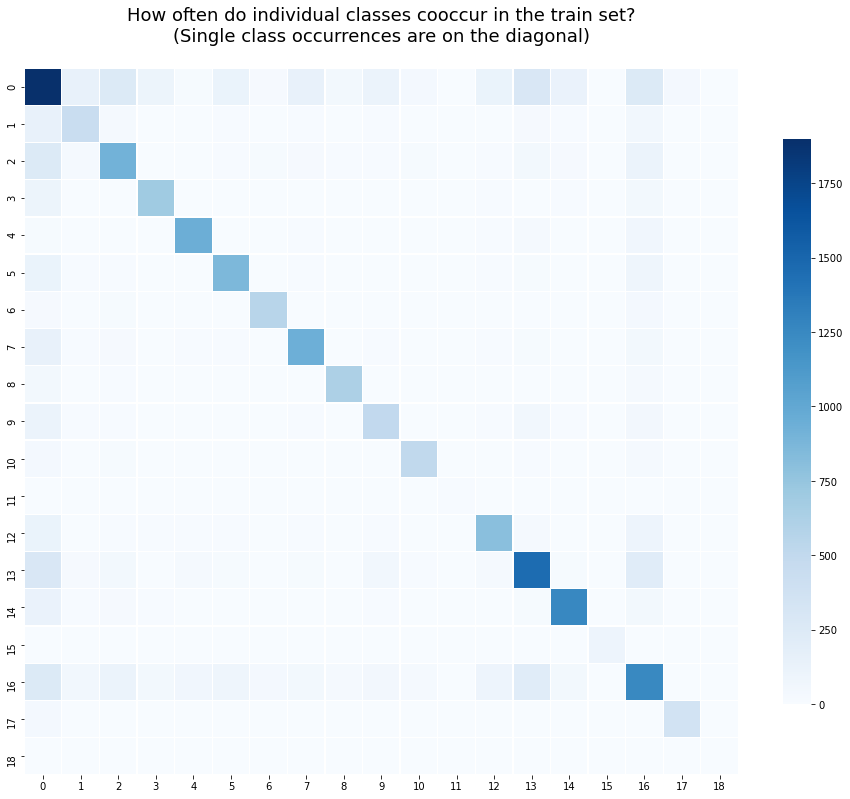

In [18]:
fig, ax = plt.subplots(figsize=(16, 13))
sns.heatmap(coocc, cmap="Blues", linewidth=0.3, cbar_kws={"shrink": .8})
title = 'How often do individual classes cooccur in the train set?\n(Single class occurrences are on the diagonal)\n'
plt.title(title, loc='center', fontsize=18)
plt.show()

## after removing few samples from 0 and 16

In [19]:
train_fold_v3 = pd.read_csv('../data/train_fold_v3.csv')

In [20]:
train_fold_v3.head()

,Unnamed: 0,ID,Label,0,1,2,3,4,5,6,...,13,14,15,16,17,18,fold,total_cell_mask,selected_cells,is_single
0,0,5c27f04c-bb99-11e8-b2b9-ac1f6b6435d0,8|5|0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,8,7,3
1,2,5c68183e-bb99-11e8-b2b9-ac1f6b6435d0,13|0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,2,10,10,2
2,4,643f73a4-bb99-11e8-b2b9-ac1f6b6435d0,14,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,12,12,1
3,5,66552404-bb99-11e8-b2b9-ac1f6b6435d0,13,0,0,0,0,0,0,0,...,1,0,0,0,0,0,2,9,9,1
4,6,6795f08c-bb99-11e8-b2b9-ac1f6b6435d0,1|0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,11,11,2


## steps

get the fold

find the class 15, 11

sample from it with constent random seed 1

add it to the traininig df

In [21]:
train_df = train_fold_v3[train_fold_v3['fold'] != 0]
print(train_df.shape)
print('15 class ',train_df[train_df['15'] == 1].shape)
print('11 class ',train_df[train_df['11'] == 1].shape)

(7456, 26)
15 class  (69, 26)
11 class  (7, 26)


In [25]:
train_15 = train_df[train_df['15'] == 1].sample(n=500, replace=True, random_state=1)
train_11 = train_df[train_df['11'] == 1].sample(n=50, replace=True, random_state=1)

In [28]:
train_df = pd.concat([train_df,train_15,train_11])

In [29]:
train_df.shape

(8006, 26)